In [40]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
import pickle

In [6]:
df = quandl.get("WIKI/GOOGL")


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0


In [8]:
df= df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [9]:
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100

In [10]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [11]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [12]:
forecast_out = int(math.ceil(0.01*len(df)))

In [13]:
forecast_out

35

In [14]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [15]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,0.332191,3272409.0,NaN
2018-03-27,1006.94,5.720301,-5.353887,2940957.0,NaN


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df.loc[:, df.columns != 'label']

In [18]:
 X = X[:-forecast_out]

In [19]:
X_lately = X[-forecast_out:]

In [20]:
df.dropna(inplace=True)
y = np.array(df['label'])

In [21]:
len(X),len(y)

(3389, 3389)

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.5)

In [23]:
#clf = LinearRegression()

In [58]:
## pickling helps not to train the classifier every time
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [59]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
accuracy = clf.score(X_test,y_test)

In [61]:
accuracy

0.9782861377419

In [62]:
forecast_set = clf.predict(X_lately)

In [63]:
forecast_set, accuracy, forecast_out

(array([1075.75100905, 1090.07094661, 1104.07900617, 1099.16444515,
        1092.83444573, 1090.1189638 , 1088.45227415, 1085.48948167,
        1079.42651643, 1075.06392993, 1072.62119387, 1091.15261655,
        1109.60267922, 1114.80742135, 1129.38832242, 1133.53160427,
        1132.50676083, 1129.72728493, 1131.64079279, 1149.14827378,
        1149.30833089, 1159.05422177, 1155.82907077, 1163.28654001,
        1182.93547228, 1195.82724759, 1190.70630939, 1202.20985989,
        1207.80394723, 1205.843172  , 1196.58215465, 1202.24754938,
        1200.55843477, 1136.66008599, 1084.36972293]), 0.9782861377419, 35)

In [64]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [65]:
import datetime

In [66]:
style.use('ggplot')

In [67]:
df['Forecast'] = np.nan

In [68]:
last_date = df.iloc[-1].name

In [69]:
last_unix = last_date.timestamp()

In [70]:
one_day = 86400

In [71]:
next_unix = last_unix + one_day

In [72]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

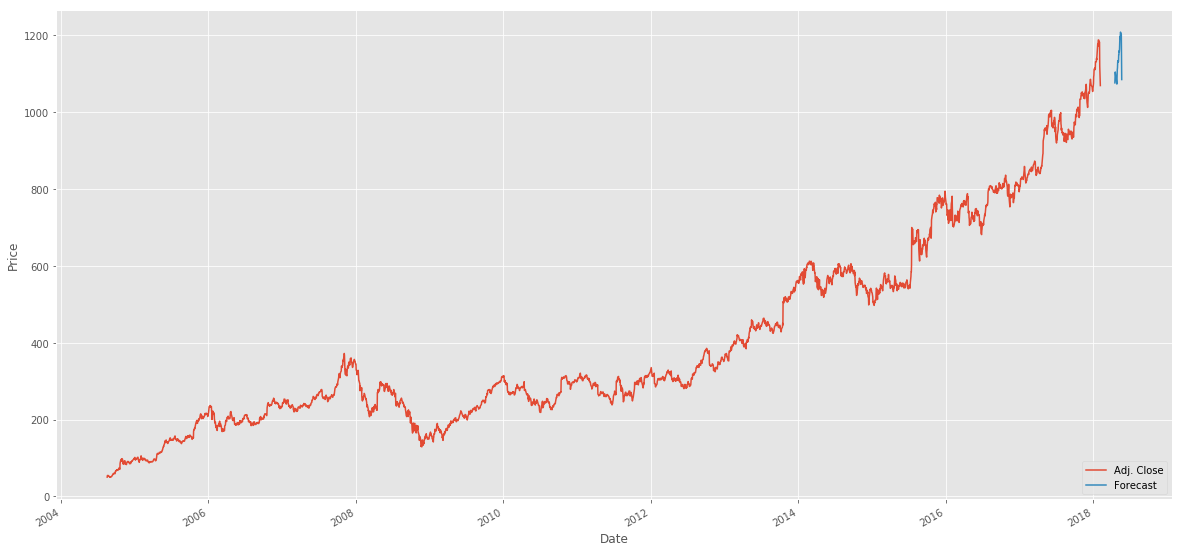

In [73]:
plt.figure(figsize=(20,10))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
